## Laplacian of Gaussian

Laplacian filter is based on the second derivative.


### Function Syntax
``` python
	dst	=	cv.Laplacian(	src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]	)
```

Parameters
* **`src`** Source image.
* **`dst`** Destination image of the same size and the same number of channels as src .
* **`ddepth`**	Desired depth of the destination image.
* **`ksize`**	Aperture size used to compute the second-derivative filters. See getDerivKernels for details. The size must be positive and odd.
* **`scale`**	Optional scale factor for the computed Laplacian values. By default, no scaling is applied. See getDerivKernels for details.
* **`delta`**	Optional delta value that is added to the results prior to storing them in dst .
* **`borderType`**	Pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

[cv.Laplacian](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6)

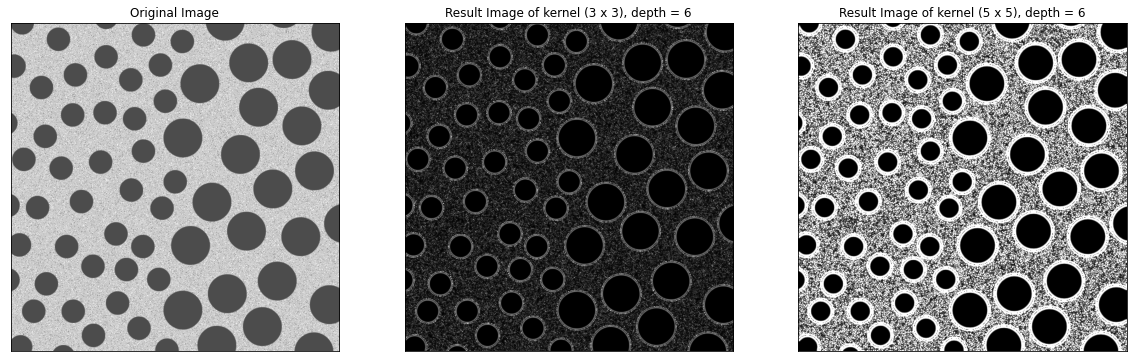

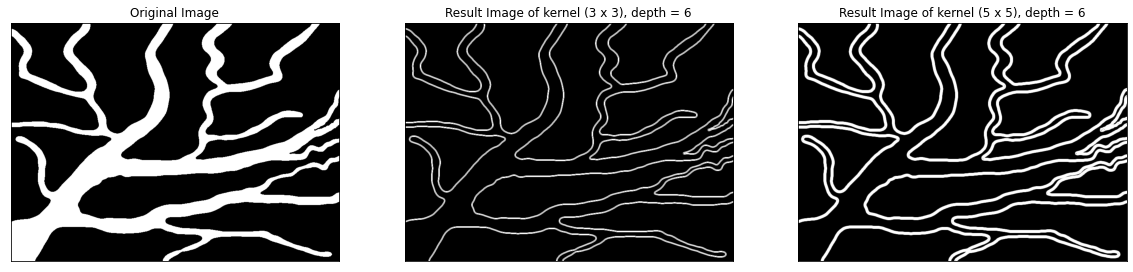

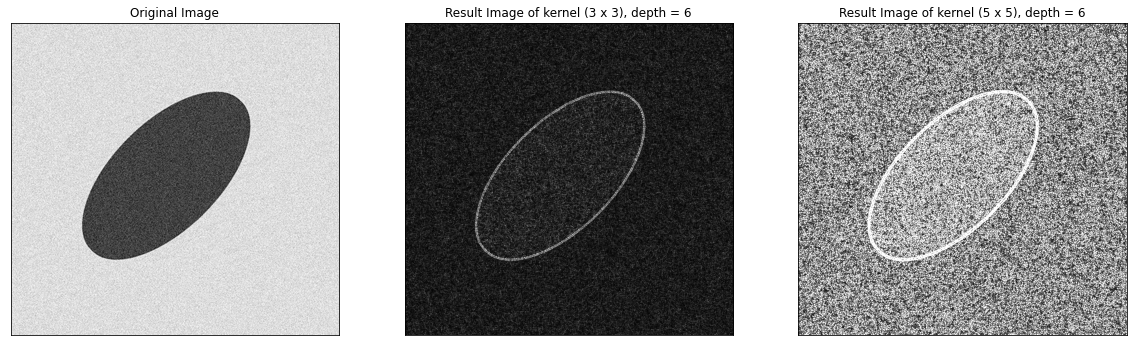

In [1]:
##########################################################################################
# Primary Contact    : v_s191@txstate.edu; vittal.siddaiah@gmail.com;
##########################################################################################
#Image Filtering using Laplacian of Gaussian
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
##############################################################################################

##############################################################################################
def LoGFilter(rawImageData, trials):
    figIds = []
    # Generating FigureId's
    maxRows = math.ceil(len(trials)/3)
    figCounter = 0
    for row in range(maxRows):
        for col in range(3):
            figIds.append((maxRows*100)+30+(figCounter + 1))
            figCounter +=1
    plt.figure(figsize=[20,10])          
    counter = 0    
    for trial in trials:
        if (trial[0] > 0):
            kernelSize = trial[0]
            ddepth = cv2.CV_64F
            strKernel = r"Result Image of kernel (%d x %d), depth = %d" % (kernelSize, kernelSize, ddepth)
            plt.subplot(figIds[counter]);
            # Gaussian Blur
            gaussianBlur = cv2.GaussianBlur(imageData, (kernelSize, kernelSize),0) 
            
            #Laplacian of Gaussian
            resultImageData = cv2.Laplacian(gaussianBlur,ddepth, ksize=kernelSize, scale = 1, delta =0) 
            resultImageData = cv2.convertScaleAbs(resultImageData)
        else:
            strKernel = "Original Image"
            plt.subplot(figIds[counter]);
            resultImageData = rawImageData
        plt.imshow(resultImageData[..., ::-1])
        plt.xticks([]), plt.yticks([]) #To remove the ticks
        plt.title(strKernel)
        counter += 1
    return 

##############################################################################################  
# Design of Experiment
##############################################################################################  
#trial = [kernelSize, sigmaX, sigmaY]
trial0 = [ 0] #Original Image
trial1 = [ 3] 
trial2 = [ 5] 

##############################################################################################

##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/blobs.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
LoGFilter(imageData, [trial0, trial1, trial2])
##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/blood-vessels.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
LoGFilter(imageData, [trial0, trial1, trial2])
##############################################################################################


##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/elliptical-object-noisy.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
LoGFilter(imageData, [trial0, trial1, trial2])
##############################################################################################


